# Visual Analytics
### Load the Dataset

In [2]:
import os
import pandas as pd
import torch 
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms
import kagglehub
import json
import pytorch_lightning as pl
from tqdm import tqdm
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import shutil
import seaborn as sns

In [3]:
# Download dataset
src_path = kagglehub.dataset_download("adilshamim8/student-performance-and-learning-style")

# Set your target path
target_path = "./data"

# Move the directory
if os.path.exists(target_path):
    shutil.rmtree(target_path)
shutil.copytree(src_path, target_path)

'./data'

In [4]:
# Load the data
df = pd.read_csv(os.path.join(target_path, "student_performance_large_dataset.csv"))
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


### Exploratory Data Analysis

Summary of the dataset

In [5]:
df.describe(include='all') 

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
count,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000
unique,10000,NaN,3,NaN,4,NaN,2,NaN,NaN,NaN,2,3,NaN,NaN,4
top,S00001,NaN,Female,NaN,Visual,NaN,Yes,NaN,NaN,NaN,Yes,Medium,NaN,NaN,A
freq,1,NaN,4846,NaN,2523,NaN,5996,NaN,NaN,NaN,7022,5015,NaN,NaN,2678
mean,NaN,23.478800,NaN,27.130300,NaN,10.007900,NaN,74.922000,70.188900,75.085100,NaN,NaN,14.936500,6.979300,NaN
std,NaN,3.461986,NaN,13.002547,NaN,6.136726,NaN,14.675437,17.649447,14.749251,NaN,NaN,9.022639,1.996965,NaN
min,NaN,18.000000,NaN,5.000000,NaN,0.000000,NaN,50.000000,40.000000,50.000000,NaN,NaN,0.000000,4.000000,NaN
25%,NaN,20.000000,NaN,16.000000,NaN,5.000000,NaN,62.000000,55.000000,62.000000,NaN,NaN,7.000000,5.000000,NaN
50%,NaN,23.000000,NaN,27.000000,NaN,10.000000,NaN,75.000000,70.000000,75.000000,NaN,NaN,15.000000,7.000000,NaN
75%,NaN,27.000000,NaN,38.000000,NaN,15.000000,NaN,88.000000,85.000000,88.000000,NaN,NaN,23.000000,9.000000,NaN


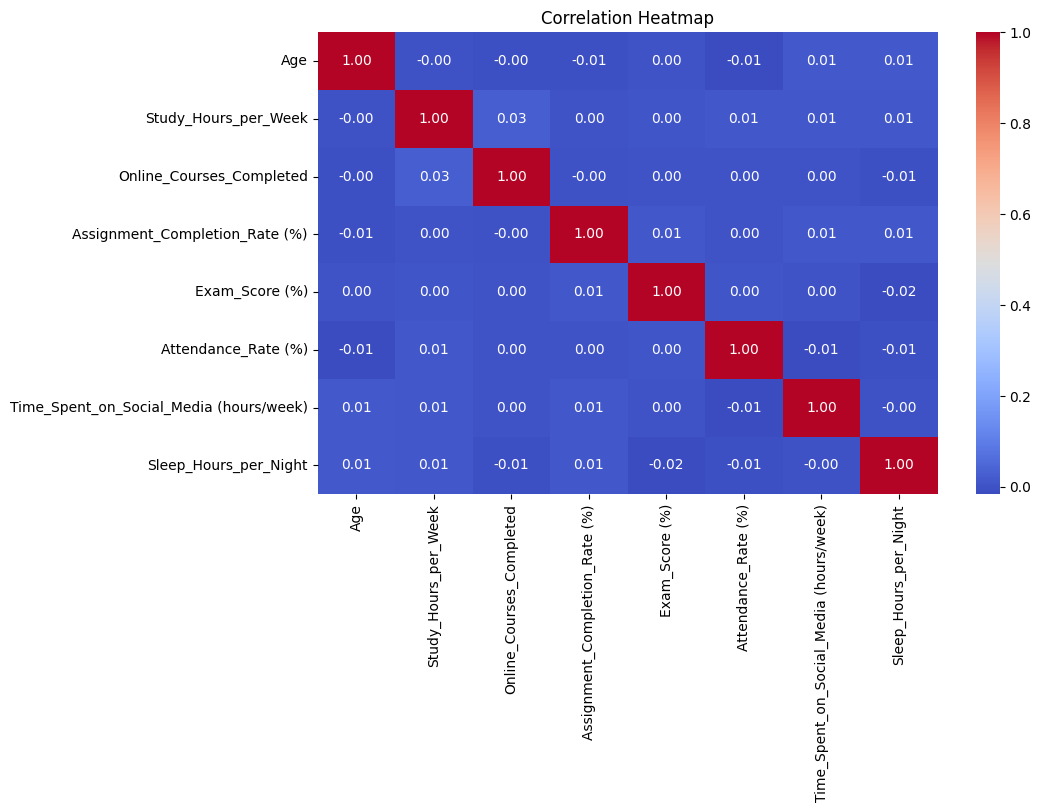

In [6]:
# Compute correlations
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Check for outliers in the data

### t-SNE

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

categorical_features = [
    "Gender",
    "Preferred_Learning_Style",
    "Participation_in_Discussions",
    "Use_of_Educational_Tech",
    "Self_Reported_Stress_Level"
]

numeric_features = [
    "Assignment_Completion_Rate (%)",
    "Attendance_Rate (%)",
    "Time_Spent_on_Social_Media (hours/week)",
    "Study_Hours_per_Week",
    "Online_Courses_Completed",
    "Sleep_Hours_per_Night",
    "Exam_Score (%)"
]

df_encoded = pd.get_dummies(df[categorical_features])
X_numeric = df[numeric_features].fillna(0)

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Combine all
import numpy as np
X_combined = np.hstack((X_scaled, df_encoded.values))


In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000, learning_rate=200)
X_tsne = tsne.fit_transform(X_combined)

/Users/jayinnejal/VA2025/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


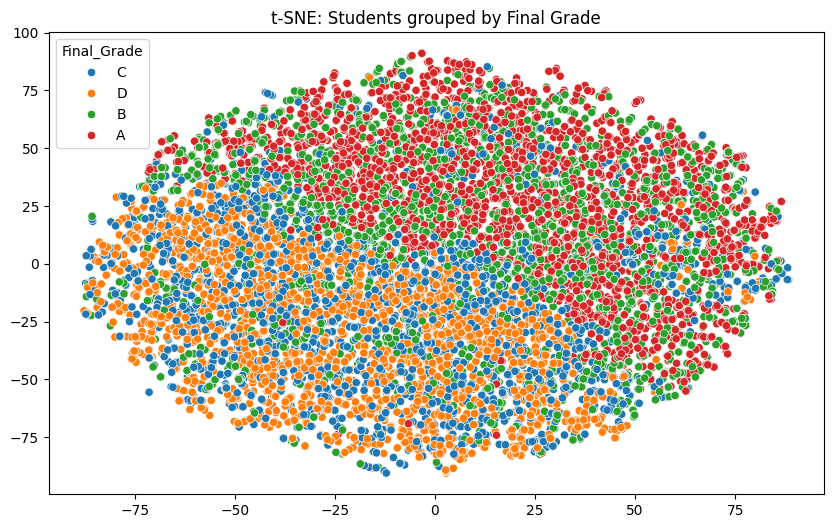

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Final_Grade"])
plt.title("t-SNE: Students grouped by Final Grade")
plt.show()

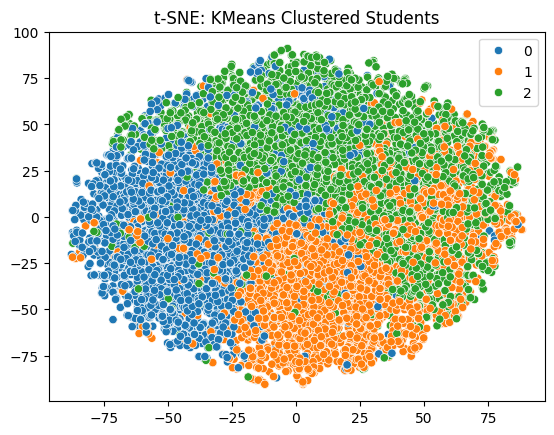

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_combined)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=cluster_labels, palette='tab10')
plt.title("t-SNE: KMeans Clustered Students")
plt.show()


In [21]:
df['Cluster'] = cluster_labels

# Group by cluster and summarize
cluster_summary = df.groupby('Cluster').agg({
    'Assignment_Completion_Rate (%)': 'mean',
    'Attendance_Rate (%)': 'mean',
    'Time_Spent_on_Social_Media (hours/week)': 'mean',
    'Study_Hours_per_Week': 'mean',
    'Online_Courses_Completed': 'mean',
    'Exam_Score (%)': 'mean',
    'Sleep_Hours_per_Night': 'mean',
    'Final_Grade': lambda x: x.value_counts().index[0],  # Most common grade
})
print(cluster_summary)


         Assignment_Completion_Rate (%)  Attendance_Rate (%)  \
Cluster                                                        
0                             73.107697            75.703428   
1                             74.961622            74.030641   
2                             76.412837            75.491705   

         Time_Spent_on_Social_Media (hours/week)  Study_Hours_per_Week  \
Cluster                                                                  
0                                       6.955692             26.533959   
1                                      23.784587             27.687094   
2                                      13.872722             27.142507   

         Online_Courses_Completed  Exam_Score (%)  Sleep_Hours_per_Night  \
Cluster                                                                    
0                        9.815006       57.673674               7.075679   
1                       10.488394       61.177654               7.097493   
2   